# Import Data 
---

In [1]:
import pandas as pd 
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

smart-open 1.8.0 requires bz2file, which is not installed.
nltk 3.4 requires singledispatch, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('Data_June24.csv')

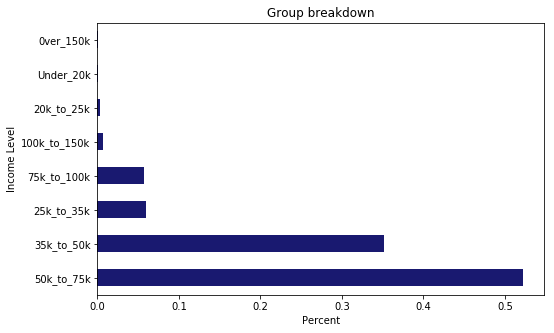

In [4]:
#visualizing targets
data.Income_level.value_counts(normalize=True).plot(kind='barh', color='midnightblue', figsize=(8,5))
plt.xlabel('Percent')
plt.ylabel('Income Level')
plt.title('Group breakdown');

In [5]:
data.head()

,Unnamed: 0,Account_ID,Entity_ID,Seller_Type,Creditor_Name,Closure_Type,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,...,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,Age_range,Unemply_rate_range,Labor_force_part_range
0,0,10271476,10921449,HOSPITAL,CHRISTUS Spohn Hospital - Alice,UNPAID,ALICE,TX,78333.0,41966.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85-89,50%+,80%+
1,1,10271477,10499137,HOSPITAL,CHRISTUS Spohn Hospital - Alice,UNPAID,AGUA DULCE,TX,78330.0,42440.0,...,11.9,9.3,10.8,17.1,13.5,6.2,3.2,50-54,3-4.9%,56-58.9%
2,2,10271478,10921451,HOSPITAL,CHRISTUS Spohn Hospital - Alice,UNPAID,ALICE,TX,78332.0,41966.0,...,13.6,12.0,12.3,11.9,11.8,5.1,3.2,55-59,5-6.9%,56-58.9%
3,3,10271479,10921452,HOSPITAL,CHRISTUS Spohn Hospital - Alice,UNPAID,ALICE,TX,78332.0,41966.0,...,13.6,12.0,12.3,11.9,11.8,5.1,3.2,65-69,5-6.9%,56-58.9%
4,4,10271480,10921453,HOSPITAL,CHRISTUS Spohn Hospital - Alice,PIF,ALICE,TX,78332.0,41966.0,...,13.6,12.0,12.3,11.9,11.8,5.1,3.2,60-64,5-6.9%,56-58.9%


In [6]:
data.columns

Index(['Unnamed: 0', 'Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range'],
      dtype='object')

In [16]:
# data.to_csv('Data_version_2.csv')

In [7]:
data.Paid.value_counts(normalize=True)

0    0.937042
1    0.062958
Name: Paid, dtype: float64

# Creating dataset `paid` (SETTLE & PIF) and `unpaid `

In [6]:
paid = data[(data.Closure_Type == 'SETTLE') | (data.Closure_Type == 'PIF')]

In [7]:
paid.shape

(556536, 37)

In [8]:
paid.dropna(inplace=True)

In [9]:
paid.shape

(528285, 37)

In [10]:
#creating a subset of data 
df_prep = paid.sample(n=50000, random_state=7)
#reseting index 
df_prep.reset_index(inplace=True)

In [11]:
df_prep.Target.value_counts(normalize=True)

A    0.27158
E    0.26214
F    0.18496
D    0.13928
C    0.11548
B    0.02656
Name: Target, dtype: float64

In [19]:
df_prep.columns

Index(['index', 'Unnamed: 0', 'Account_ID', 'Entity_ID', 'Seller_Type',
       'Creditor_Name', 'Closure_Type', 'Entity_City', 'Entity_State',
       'Entity_Zip', 'Median_Household_Income', 'Total_Paid',
       'Number_of_payments', 'Percent_Paid', 'Invoice_bal', 'Age', 'Target',
       'Income_level', 'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age',
       'Paid', 'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range'],
      dtype='object')

In [36]:
drop_columns = ['index','Unnamed: 0','Account_ID', 'Entity_ID','Closure_Type', 
                'Entity_City', 'Entity_State', 'Entity_Zip',
                'Total_Paid', 'Number_of_payments',
                'Percent_Paid', 'Target','Paid','Creditor_Name', 
                'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
                'age_70s', 'age_over_80']

In [37]:
#creating features to feed into predictors 
features = df_prep.drop(drop_columns, axis=1, inplace=False)
#creating target variable (y)
target = df_prep.Target 
#creating dummies, one-hot encode prior to standardizing 
predictors = pd.get_dummies(features)

In [38]:
import time
start_time = time.time()

#scaling features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(predictors)


from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, auc, accuracy_score, classification_report, roc_curve, precision_score,recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn import svm 
import warnings
warnings.filterwarnings("ignore")

#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=10, test_size=0.3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.19127511978149414 seconds ---


In [15]:
print('Number of features:',len(features.columns))
features.columns

Number of features: 24


Index(['Seller_Type', 'Median_Household_Income', 'Invoice_bal', 'Age',
       'Income_level', 'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range'],
      dtype='object')

# Model 1

In [16]:
start_time = time.time() 

pipe_logreg_lasso = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1',C= 333.334, random_state=123))])
pipe_logreg_ridge = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2',C= 333.334, random_state=123))])
pipe_rf = Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123))])
pipe_svm= Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', svm.SVC(C=10, kernel='linear',random_state=123))])            
                      
                                                             
# list pipelines, list of pipeline names
pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf]
names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest']
pipe_Models = []

# loop to fit each of the three pipelines
for i in pipelines: 
    print(i)
    i.fit(X_train, y_train);
    
for index, val in enumerate(pipelines): 
    print('%s pipeline train accuracy: %.3f' % (names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (names[index], val.score(X_test, y_test)))
    
    score = names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    pipe_Models.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))  

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=333.334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=333.334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_s

In [17]:
#storing results in dataframe
model = pd.DataFrame.from_records(pipe_Models,  columns=['Model', 'Train', 'Test'])
model.mean()

Train    0.524676
Test     0.315333
dtype: float64

In [18]:
#printing our classification report for all models
for index, val in enumerate(pipelines):
    print(f'{names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

LogReg Lasso:
              precision    recall  f1-score   support

           A       0.33      0.76      0.46      4095
           B       0.00      0.00      0.00       413
           C       0.00      0.00      0.00      1736
           D       0.00      0.00      0.00      2078
           E       0.30      0.41      0.34      3928
           F       0.36      0.03      0.05      2750

   micro avg       0.32      0.32      0.32     15000
   macro avg       0.17      0.20      0.14     15000
weighted avg       0.23      0.32      0.23     15000

--------------------------------------------------------
LogReg Ridge:
              precision    recall  f1-score   support

           A       0.33      0.76      0.46      4095
           B       0.00      0.00      0.00       413
           C       0.00      0.00      0.00      1736
           D       0.00      0.00      0.00      2078
           E       0.30      0.41      0.34      3928
           F       0.36      0.03      0.05    

# Balancing data (SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target,random_state=10, test_size=0.3)

In [40]:
X_smote, y_smote = SMOTE().fit_sample(X_train, y_train)

In [41]:
#perform normal train-test-split using our SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state= 10, test_size=0.3)

# SMOTE Model

l1 {'logisticregression__C': 111.11200000000001}
l2 {'logisticregression__C': 0.001}
rf {'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 100}
gb {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 200}

In [42]:
start_time = time.time()

pipe_logreg_lasso = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l1',C= 333.334, random_state=123))])
pipe_logreg_ridge = Pipeline([('pca', PCA(n_components=14, random_state=123)),
                    ('clf', LogisticRegression(penalty= 'l2',C= 333.334, random_state=123))])
pipe_rf = Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features='auto', n_estimators=100, random_state=123))])
 
                                         
# list pipelines, list of pipeline names
s_pipelines =  [pipe_logreg_lasso, pipe_logreg_ridge, pipe_rf]
s_names = ['LogReg Lasso', 'LogReg Ridge', 'Random Forest']
s_pipe_Model = []

# loop to fit each of the three pipelines
for i in s_pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(s_pipelines): 
    print('%s pipeline train accuracy: %.3f' % (s_names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (s_names[index], val.score(X_test, y_test)))
    
    score = s_names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    s_pipe_Model.append(score)
                        
print("--- %s seconds ---" % (time.time() - start_time))                        
 

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=333.334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=333.334, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=123,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_s

In [43]:
s_model = pd.DataFrame.from_records(s_pipe_Model,  columns=['SMOTE_Model', 'Train', 'Test'])
print(s_model.mean())
s_model

Train    0.451421
Test     0.307716
dtype: float64


,SMOTE_Model,Train,Test
0,LogReg Lasso,0.223564,0.217198
1,LogReg Ridge,0.223564,0.217198
2,Random Forest,0.907135,0.488754


In [44]:
#creating function to convert list to tuple
def convert(list): 
    return tuple(list) 

Models_mean = [model.mean(), s_model.mean()]
Models_specs = []

for i in Models_mean:
    Models_specs.append(convert(i))
    
Models_data_mean = pd.DataFrame.from_records(Models_specs,  columns=['Train', 'Test'])

In [45]:
#appending a Residual column 
Models_data_mean.index = np.arange(1, len(Models_data_mean) + 1)
Models_data_mean['Residual'] = Models_data_mean.Test - Models_data_mean.Train
Models_data_mean

#setting index to model names
Models_data_mean = Models_data_mean.set_index([pd.Index(['Model', 'SMOTE_Model'])])
Models_data_mean

,Train,Test,Residual
Model,0.524676,0.315333,-0.209343
SMOTE_Model,0.451421,0.307716,-0.143705


In [46]:
#printing our classification report for all models
for index, val in enumerate(s_pipelines):
    print(f'{s_names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

LogReg Lasso:
              precision    recall  f1-score   support

           A       0.24      0.55      0.34      2886
           B       0.21      0.29      0.24      2903
           C       0.18      0.06      0.10      2814
           D       0.17      0.06      0.08      2826
           E       0.17      0.08      0.11      2844
           F       0.23      0.25      0.24      2799

   micro avg       0.22      0.22      0.22     17072
   macro avg       0.20      0.22      0.18     17072
weighted avg       0.20      0.22      0.19     17072

--------------------------------------------------------
LogReg Ridge:
              precision    recall  f1-score   support

           A       0.24      0.55      0.34      2886
           B       0.21      0.29      0.24      2903
           C       0.18      0.06      0.10      2814
           D       0.17      0.06      0.08      2826
           E       0.17      0.08      0.11      2844
           F       0.23      0.25      0.24    

# Conclusions 

In [47]:
start_time

forest = RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123)
forest.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))   

--- 241.79118490219116 seconds ---


In [48]:
rf_imp = forest.feature_importances_

In [49]:
rf_list = []

for name, importance in zip(features, 100*(rf_imp/ rf_imp.max())):
    print(name, '=', importance)
    rf_list.append(importance)
    
print('\n')    



Seller_Type = 72.5543872516558
Median_Household_Income = 95.68509935336962
Invoice_bal = 90.02828749363417
Age = 98.37579118526436
Income_level = 93.19329135629715
Age_MedIncome = 100.0
Invbal_MedIncome = 74.43874775825225
Invbal_Age = 80.15504235266933
unemployment_rate = 75.64115856109689
labor_force_participation = 72.89549258591178
education_highschool = 75.91228957844629
education_college_or_above = 78.71270388266993
home_value = 5.906348357479614
rent_burden = 6.142657517908586
Age_range = 0.010671621213230847
Unemply_rate_range = 0.5304816100930988
Labor_force_part_range = 0.1424819607362609




In [50]:
ft = pd.DataFrame(features.columns)
rf = pd.DataFrame(rf_list) 

random = pd.concat([ft, rf],axis=1)
random.columns = ['features', 'coef']
random = random.sort_values('coef', ascending=True)

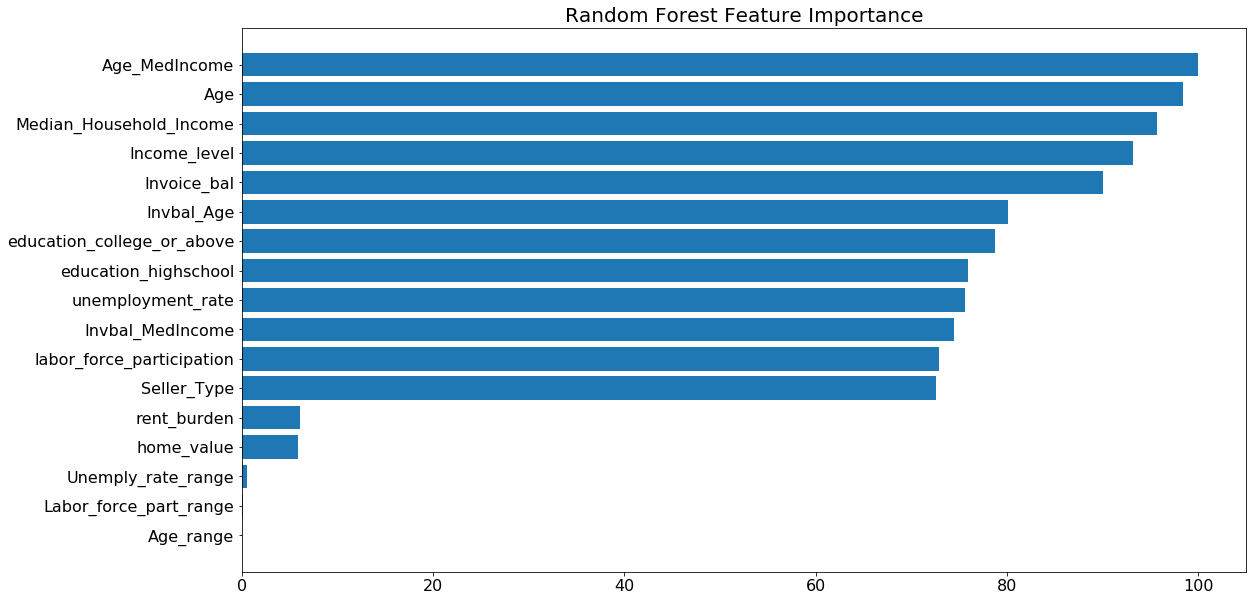

In [55]:
plt.figure(figsize=(18,10))
plt.barh(random.features, random.coef)
plt.title('Random Forest Feature Importance', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

# GridSearch 

In [59]:
start_time = time.time()
#spliting our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

from sklearn.pipeline import make_pipeline

#build pipelines

#model pipelines 
pipelines = {'l1': make_pipeline(StandardScaler(),
                                LogisticRegression(penalty='l1', random_state=123)),
             'l2': make_pipeline(StandardScaler(),
                                LogisticRegression(penalty='l2', random_state=123)),
             'rf': make_pipeline(StandardScaler(),
                                RandomForestClassifier(random_state=123)),
             'gb': make_pipeline(StandardScaler(),
                                GradientBoostingClassifier(random_state=123))
            }
print("--- %s seconds ---" % (time.time() - start_time))  

pipelines

--- 0.033032894134521484 seconds ---


{'l1': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'l2': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(boot

In [61]:
#declare hyperparameters
#research proper range for each hyperparameter to allow for best performance in GridSearchCV
l1_hp = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
l2_hp = {'logisticregression__C': np.linspace(1e-3, 1e3, 10)}
rf_hp = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
    }
gb_hp = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
    }

hyperparameters = {'l1': l1_hp,
                   'l2': l2_hp,
                   'rf': rf_hp,
                   'gb': gb_hp
                  }

In [62]:
start_time = time.time()

#fit and tune with cross-validation
fitted_models = {}

for name, pipeline in pipelines.items():
    #Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=7, n_jobs=-1)
    
    #Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    
print("--- %s seconds ---" % (time.time() - start_time))  

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
--- 294.6104431152344 seconds ---


In [63]:
# evaluation metrics, printing best cross-validated score
#represents different metrics depending on your machine learning task. 

for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.2923809523809524
l2 0.29714285714285715
rf 0.29095238095238096
gb 0.3271428571428571


In [64]:
#finding best parameters
for name, model in fitted_models.items():
    print(name, model.best_params_)

l1 {'logisticregression__C': 111.11200000000001}
l2 {'logisticregression__C': 0.001}
rf {'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 100}
gb {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 200}


In [59]:
pred_test = forest.predict(X_test)
pred_train = forest.predict(X_train)

In [60]:
conf_maxtrix_test = pd.crosstab(y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])
conf_maxtrix_train = pd.crosstab(y_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

In [61]:
conf_maxtrix_test

PRED,0,1
ACTUAL,,
0,8211,1683
1,1039,8758


In [62]:
conf_maxtrix_train

PRED,0,1
ACTUAL,,
0,22909,14
1,32,22988


In [63]:
forest.predict_proba(X_test[1].reshape(1, -1))

array([[0.25, 0.75]])

In [65]:
def confusion_matrix(labels, predictions):
    conf_matrix = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for ind, label in enumerate(labels):
        pred = predictions[ind]
        if label == 1:
            # CASE: True Positive
            if label == pred:
                conf_matrix['TP'] += 1
            # CASE: False Negative 
            else:
                conf_matrix['FN'] += 1
        else:
            # CASE: True Negative
            if label == pred:
                conf_matrix['TN'] += 1
            # CASE: False Positive
            else:
                conf_matrix['FP'] += 1
    
    return conf_matrix

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

Test size is 19,691 records or 30% of 50k

In [74]:
print('Test Count:',np.bincount(y_test))
print('Train Count:',np.bincount(y_train))

Test Count: [9894 9797]
Train Count: [22923 23020]


In [73]:
np.bincount(pred_test)

array([ 9250, 10441])

In [66]:
confusion_matrix(y_test, pred_test)

{'TP': 8758, 'FP': 1683, 'TN': 8211, 'FN': 1039}

# Testing New Data

In [75]:
#creating a test data for "Unseen"
test_data = data.sample(n=100000, random_state=123)
#reseting index 
test_data.reset_index(inplace=True)


In [113]:
#creating features to feed into predictors 
test_features = test_data.drop(drop_columns, axis=1, inplace=False)
#creating target variable (y)
y = test_data.Paid 
#creating dummies, one-hot encode prior to standardizing 
test_predictors = pd.get_dummies(test_features)


scaler = StandardScaler()
X = scaler.fit_transform(test_predictors)

In [114]:
X, y = SMOTE().fit_sample(X, y)

In [115]:
forest = RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [116]:
print('Random Forrest Classifier:')
print(classification_report(y_test, forest.predict(X_test)))
print('---------------------------------------------------------')

Random Forrest Classifier:
              precision    recall  f1-score   support

           0       0.54      0.72      0.62      9894
           1       0.57      0.38      0.46      9797

   micro avg       0.55      0.55      0.55     19691
   macro avg       0.56      0.55      0.54     19691
weighted avg       0.56      0.55      0.54     19691

---------------------------------------------------------


In [117]:
pred_New_data = forest.predict(X)

In [118]:
conf_maxtrix_test_data = pd.crosstab(y,pd.Series(pred_New_data),rownames=['ACTUAL'],colnames=['PRED'])

In [119]:
test_data.Paid.value_counts()

0    93726
1     6274
Name: Paid, dtype: int64

In [120]:
conf_maxtrix_test_data

PRED,0,1
ACTUAL,,
0,93659,67
1,217,93509


In [125]:
print(np.bincount(pred_New_data))
print(np.bincount(y))

[93876 93576]
[93726 93726]


In [121]:
confusion_matrix(y, pred_New_data)

{'TP': 93509, 'FP': 67, 'TN': 93659, 'FN': 217}

In [122]:
forest.predict_proba(X[1].reshape(1, -1))

array([[0.81, 0.19]])

# Test 2

In [89]:
#creating a test data for "Unseen"
test_2 = data.sample(n=10000, random_state=5)
#reseting index 
test_2.reset_index(inplace=True)


In [91]:
test_2.Paid.value_counts()

0    9402
1     598
Name: Paid, dtype: int64

In [104]:
#creating features to feed into predictors 
test_features = test_2.drop(drop_columns, axis=1, inplace=False)
#creating target variable (y)
y = test_2.Paid 
#creating dummies, one-hot encode prior to standardizing 
test_predictors = pd.get_dummies(test_features)


scaler = StandardScaler()
X = scaler.fit_transform(test_predictors)

In [105]:
forest = RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [106]:
print('Random Forrest Classifier:')
print(classification_report(y_test, forest.predict(X_test)))
print('---------------------------------------------------------')

Random Forrest Classifier:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9894
           1       0.00      0.00      0.00      9797

   micro avg       0.50      0.50      0.50     19691
   macro avg       0.25      0.50      0.33     19691
weighted avg       0.25      0.50      0.34     19691

---------------------------------------------------------


In [107]:
pred_New_data = forest.predict(X)

In [108]:
conf_maxtrix_test_data = pd.crosstab(y,pd.Series(pred_New_data),rownames=['ACTUAL'],colnames=['PRED'])

In [109]:
test_2.Paid.value_counts()

0    9402
1     598
Name: Paid, dtype: int64

In [110]:
conf_maxtrix_test_data

PRED,0,1
ACTUAL,,
0,9401,1
1,8,590


In [111]:
confusion_matrix(y, pred_New_data)

{'TP': 590, 'FP': 1, 'TN': 9401, 'FN': 8}

In [112]:
forest.predict_proba(X[1].reshape(1, -1))

array([[0.955, 0.045]])

In [93]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
show_cf(example_labels, example_preds)

recall refers to the percentage of total relevant results correctly classified by your algorithm.

Recall = TP / (TP + FN) 